In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.ndimage.interpolation import map_coordinates
from skimage.exposure import rescale_intensity
from skimage.transform import rotate

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *
from distributed_utilities import *
from visualization_utilities import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for Local Macbook Pro


Cannot import mxnet.


In [2]:
stack = 'MD590'
vol_fixedvol = DataManager.load_intensity_volume(stack=stack, downscale=32)

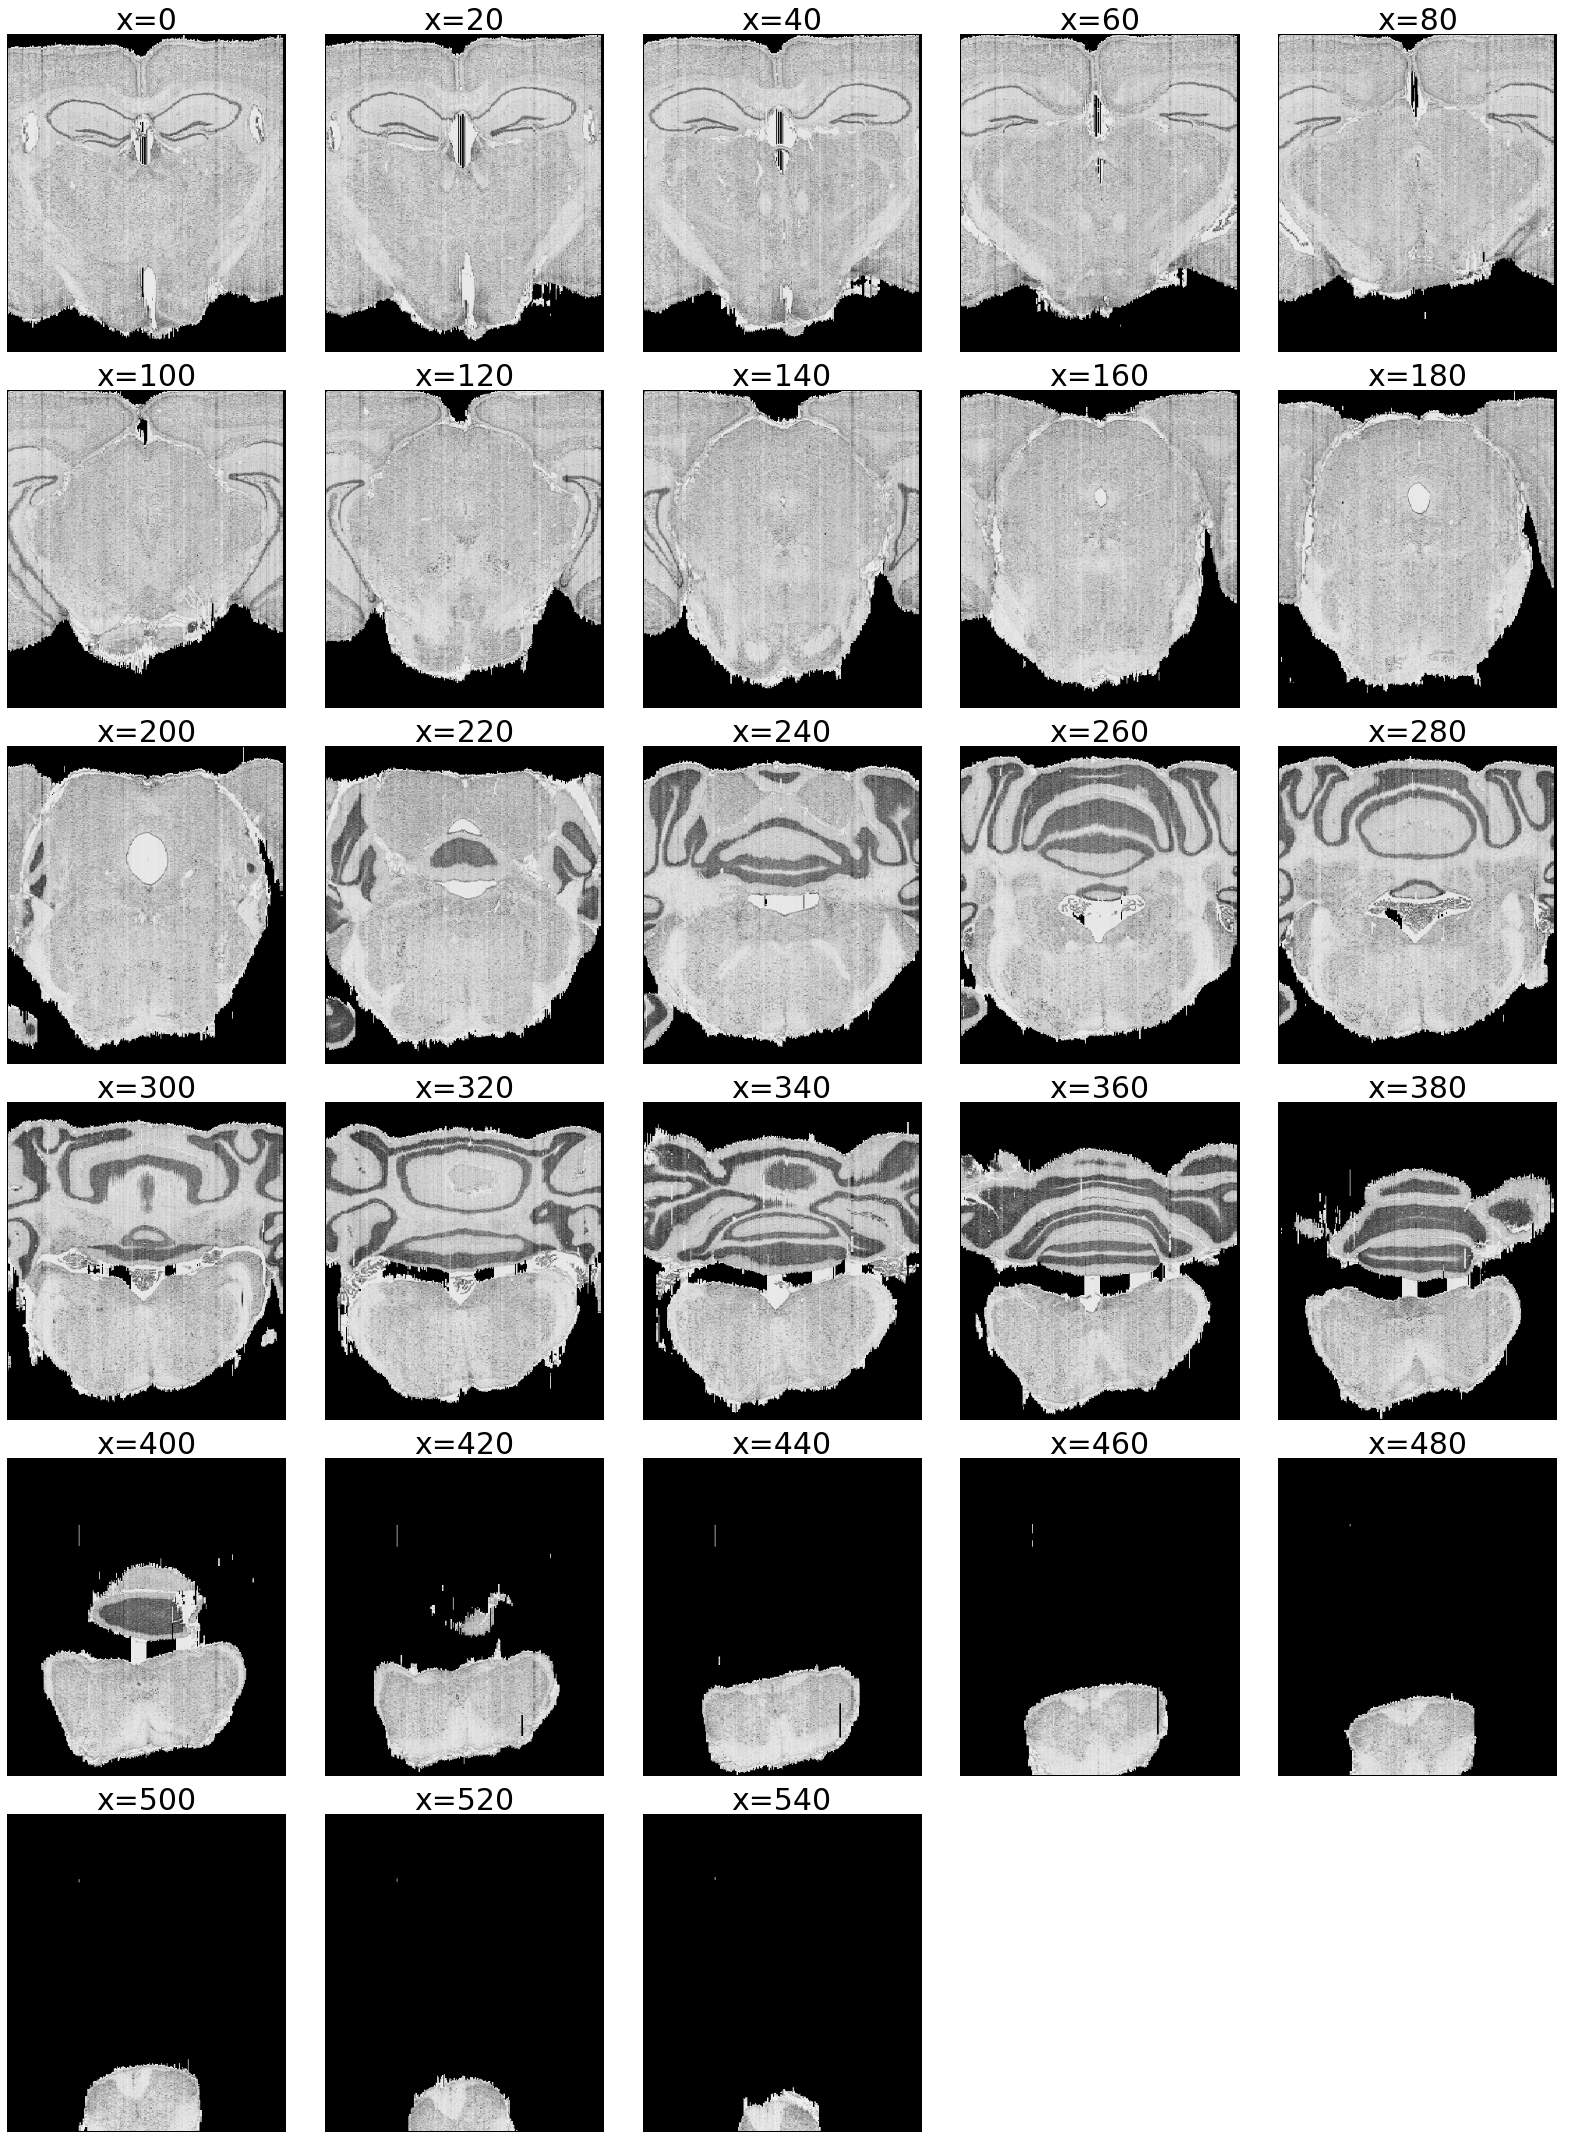

In [3]:
display_volume_sections(vol_fixedvol, every=20, direction='x', cmap=plt.cm.gray)

Interpolating/filling sparse volume: 0.00 seconds.


(-74, 529, -42, 403, -22, 386)


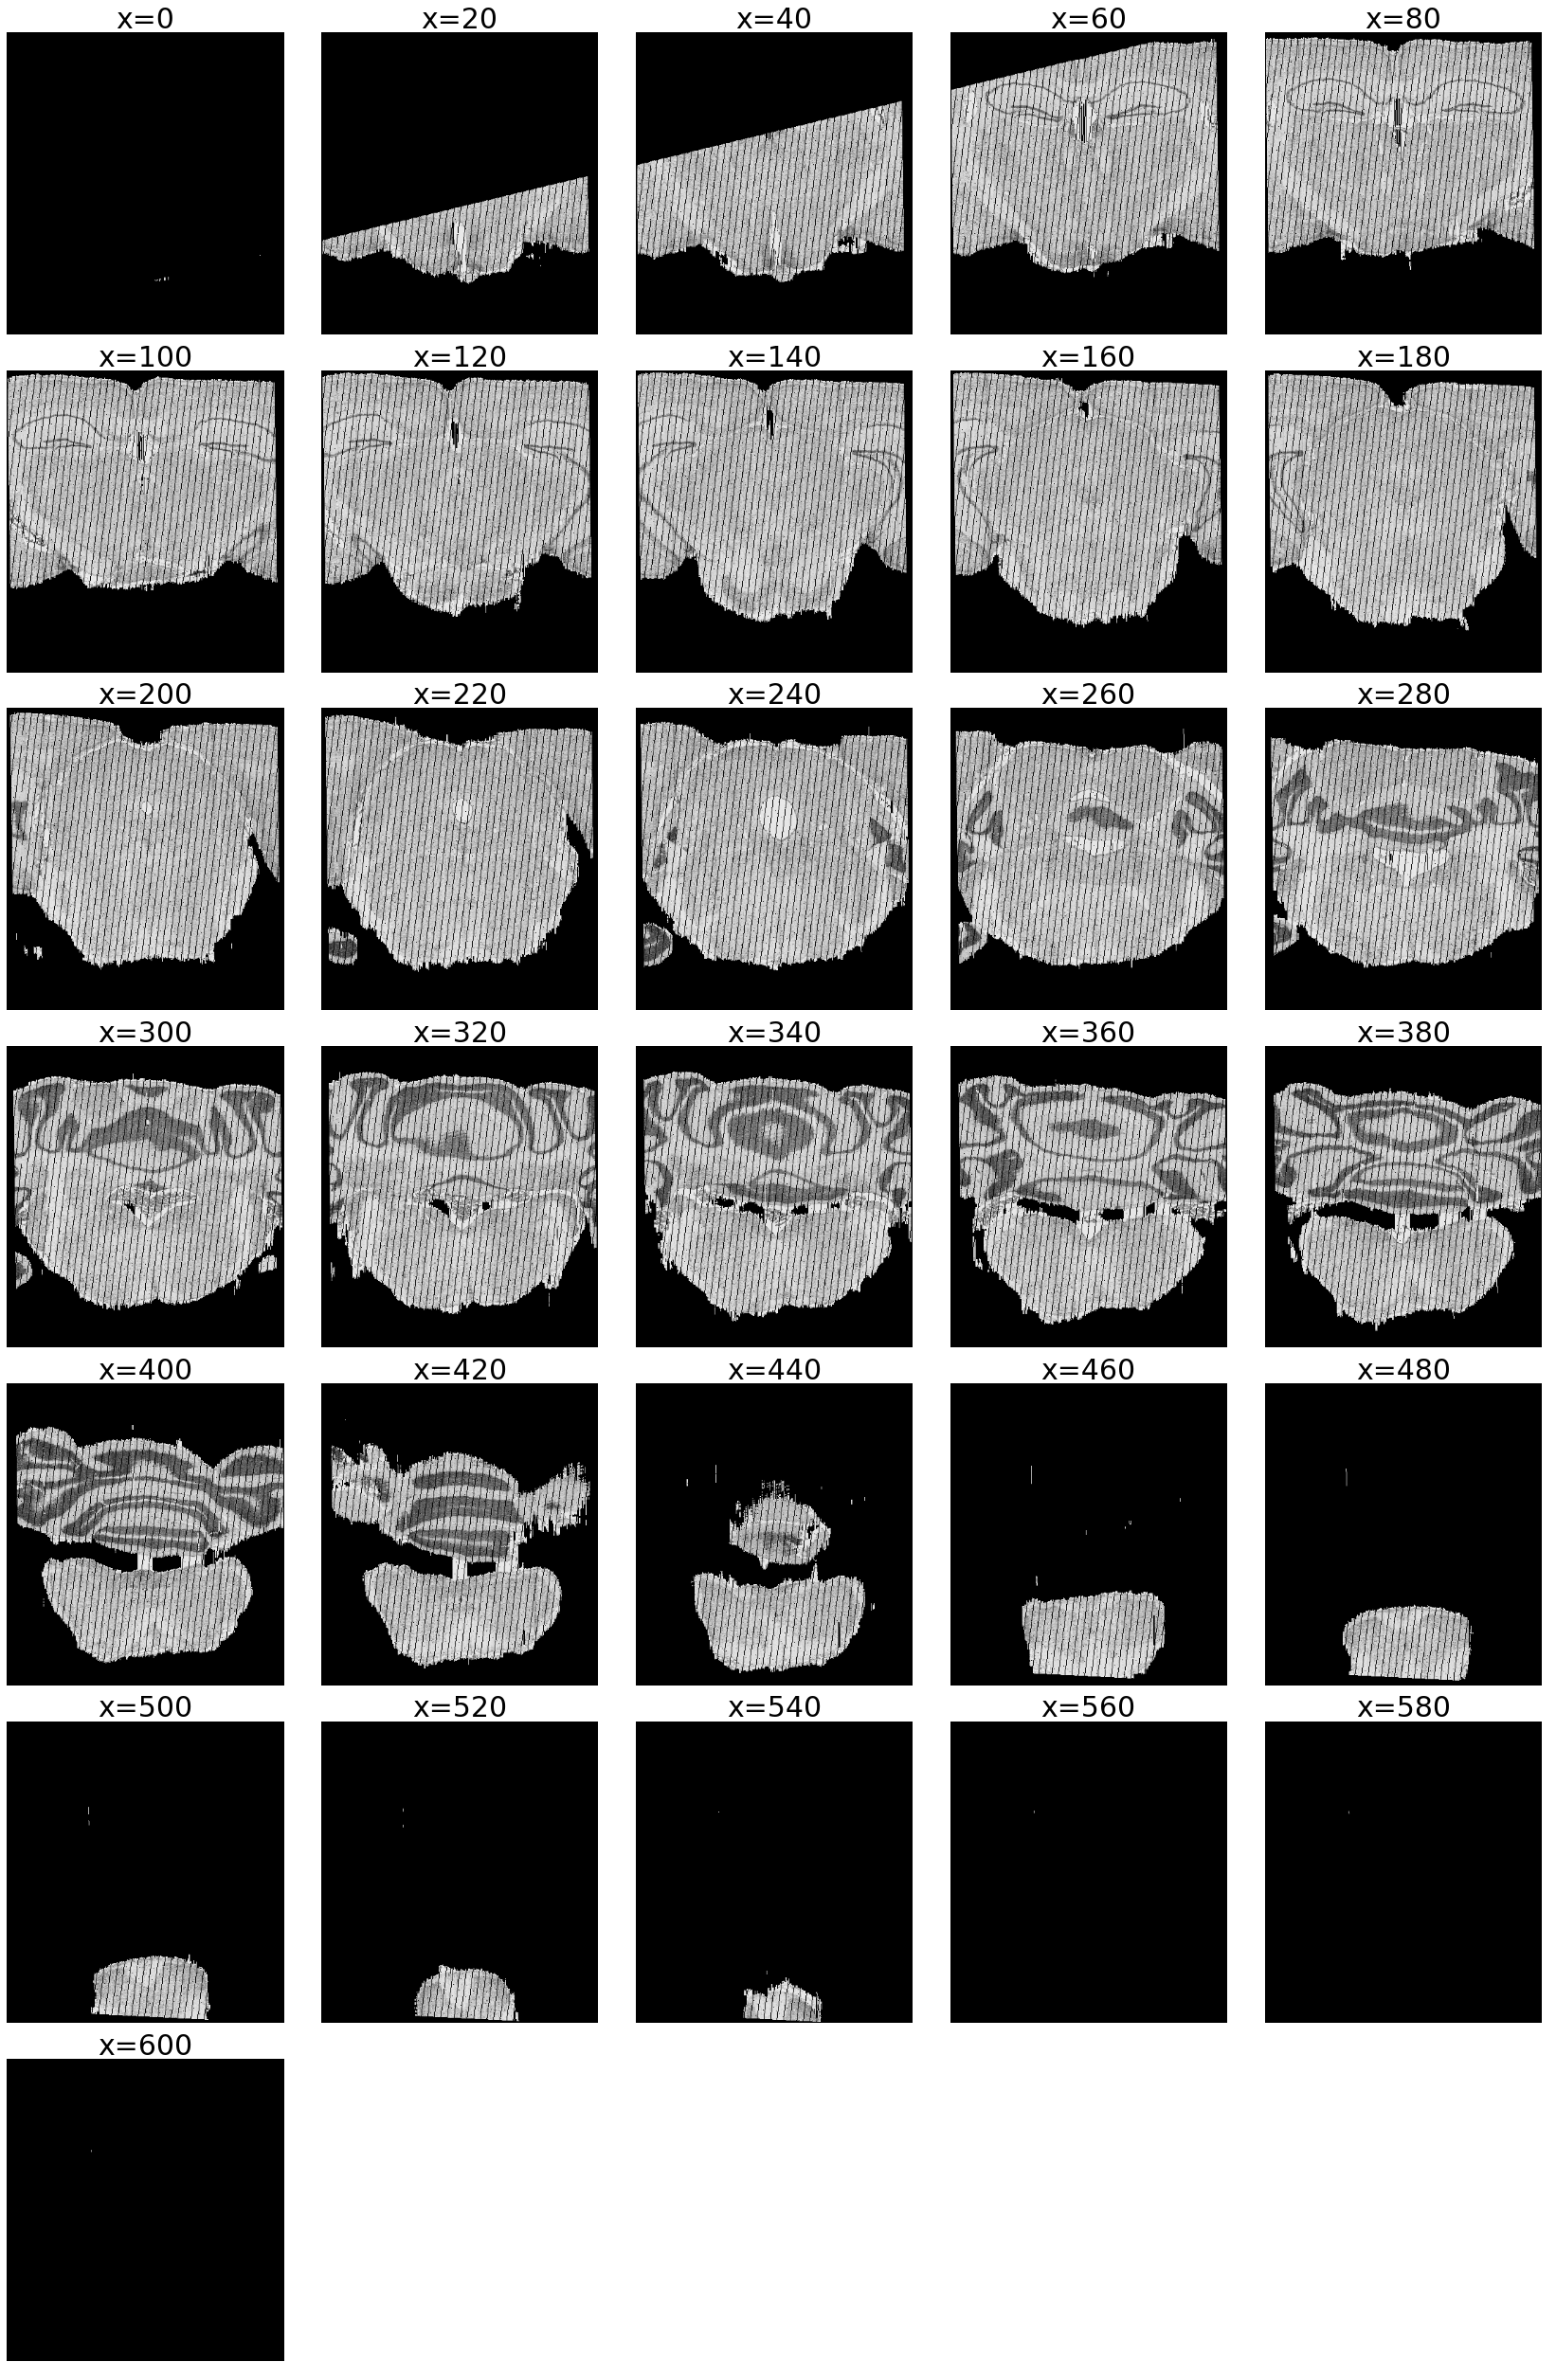

In [4]:
params, cm, cf, _,_,_,_,_,_ = DataManager.load_alignment_parameters(stack_f=stack, stack_m='atlasV5', 
                                                                    warp_setting=20, 
                                      prep_id_f=2, 
                                      detector_id_f=15, 
                                      vol_type_f='score', 
                                      vol_type_m='score')

G_atlas2fixedvol = consolidate(params, cm, cf)
G_fixedvol2atlas = np.linalg.inv(G_atlas2fixedvol)[:3]

vol_fixedvol_rel2atlas, bbox_fixedvol_rel2atlas = transform_volume_v2(vol_fixedvol, G_fixedvol2atlas.flatten())
print bbox_fixedvol_rel2atlas

display_volume_sections(vol_fixedvol_rel2atlas, every=20, direction='x', cmap=plt.cm.gray, vmin=0, vmax=255)